## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
from scipy import stats
import re

In [2]:
flights_1 = pd.read_csv('data/flights_1%.csv')
fuel_consumption = pd.read_csv('data/fuel_consumption.csv')
passengers_10 = pd.read_csv('data/passengers_10%.csv')
test = pd.read_csv('data/test.csv')
pd.set_option('display.max_columns', None)

In [3]:
flights_1.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [4]:
flights_1.head()

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,dest,dest_city_name,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,cancellation_code,diverted,dup,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-12-19,WN,WN,WN,493,WN,N421LV,493,13342,MKE,"Milwaukee, WI",13204,MCO,"Orlando, FL",1140,1146.0,6.0,9.0,1155.0,1513.0,6.0,1515,1519.0,4.0,0,NaN,0,N,155,153.0,138.0,1,1066,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-12-19,WN,WN,WN,51,WN,N7719A,51,13495,MSY,"New Orleans, LA",11259,DAL,"Dallas, TX",1655,1655.0,0.0,10.0,1705.0,1816.0,7.0,1820,1823.0,3.0,0,NaN,0,N,85,88.0,71.0,1,436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-12-19,WN,WN,WN,2398,WN,N724SW,2398,13495,MSY,"New Orleans, LA",12191,HOU,"Houston, TX",610,620.0,10.0,12.0,632.0,725.0,3.0,730,728.0,-2.0,0,NaN,0,N,80,68.0,53.0,1,302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-12-19,WN,WN,WN,943,WN,N8685B,943,13796,OAK,"Oakland, CA",12889,LAS,"Las Vegas, NV",1745,1745.0,0.0,13.0,1758.0,1901.0,5.0,1910,1906.0,-4.0,0,NaN,0,N,85,81.0,63.0,1,407,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-19,WN,WN,WN,2443,WN,N8698B,2443,13851,OKC,"Oklahoma City, OK",11292,DEN,"Denver, CO",600,558.0,-2.0,8.0,606.0,618.0,6.0,645,624.0,-21.0,0,NaN,0,N,105,86.0,72.0,1,495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
flights_1.describe()

,mkt_carrier_fl_num,op_carrier_fl_num,origin_airport_id,dest_airport_id,crs_dep_time,dep_time,dep_delay,taxi_out,wheels_off,wheels_on,taxi_in,crs_arr_time,arr_time,arr_delay,cancelled,diverted,crs_elapsed_time,actual_elapsed_time,air_time,flights,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
count,159961.000000,159961.000000,159961.000000,159961.000000,159961.000000,157456.000000,157396.000000,157305.000000,157307.000000,157242.000000,157240.000000,159961.000000,157304.000000,156904.000000,159961.000000,159961.000000,159961.000000,156938.000000,156876.000000,159961.0,159961.000000,30006.000000,30006.000000,30006.000000,30006.000000,30006.000000,1063.000000,1063.000000,1063.000000,0.0
mean,2733.833941,2733.827927,12691.153250,12673.365914,1328.890548,1334.127718,10.518565,17.498141,1358.618059,1459.692194,7.687770,1483.098993,1464.231081,5.444909,0.016310,0.002588,137.932859,133.154144,108.025683,1.0,768.983834,20.636273,4.141072,16.071652,0.091415,27.027528,1344.516463,41.082785,40.466604,NaN
std,1864.051970,1864.214715,1522.691443,1521.415464,489.678493,503.086656,48.676050,9.969041,504.562665,532.107638,6.195948,516.991582,536.355568,50.775570,0.126666,0.050808,71.428902,71.489945,69.542472,0.0,584.696281,65.467117,35.200001,36.628748,2.582176,54.173376,506.650477,36.028926,34.924273,NaN
min,1.000000,1.000000,10135.000000,10135.000000,1.000000,1.000000,-47.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,-69.000000,0.000000,0.000000,18.000000,14.000000,8.000000,1.0,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,NaN
25%,1121.000000,1121.000000,11292.000000,11292.000000,915.000000,918.000000,-6.000000,11.000000,933.000000,1044.000000,4.000000,1100.000000,1048.000000,-15.000000,0.000000,0.000000,87.000000,82.000000,58.000000,1.0,341.000000,0.000000,0.000000,0.000000,0.000000,0.000000,859.000000,17.000000,17.000000,NaN
50%,2317.000000,2317.000000,12889.000000,12889.000000,1320.000000,1326.000000,-2.000000,15.000000,1340.000000,1500.000000,6.000000,1511.000000,1503.000000,-6.000000,0.000000,0.000000,119.000000,115.000000,89.000000,1.0,604.000000,0.000000,0.000000,3.000000,0.000000,3.000000,1401.000000,30.000000,30.000000,NaN
75%,4325.000000,4325.000000,14057.000000,14057.000000,1735.000000,1743.000000,6.000000,20.000000,1759.000000,1908.000000,9.000000,1915.000000,1913.000000,8.000000,0.000000,0.000000,168.000000,163.000000,137.000000,1.0,1005.000000,17.000000,0.000000,20.000000,0.000000,33.000000,1737.500000,52.000000,51.000000,NaN
max,9391.000000,9391.000000,16869.000000,16869.000000,2359.000000,2400.000000,1671.000000,170.000000,2400.000000,2400.000000,193.000000,2359.000000,2400.000000,1648.000000,1.000000,1.000000,695.000000,685.000000,650.000000,1.0,5095.000000,1484.000000,1236.000000,1243.000000,205.000000,1648.000000,2349.000000,229.000000,229.000000,NaN


#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

In [74]:
delay = flights_1.arr_delay#.sample(5000)

In [75]:
delay.isnull().sum()

3057

In [76]:
delay_nona = delay.dropna()

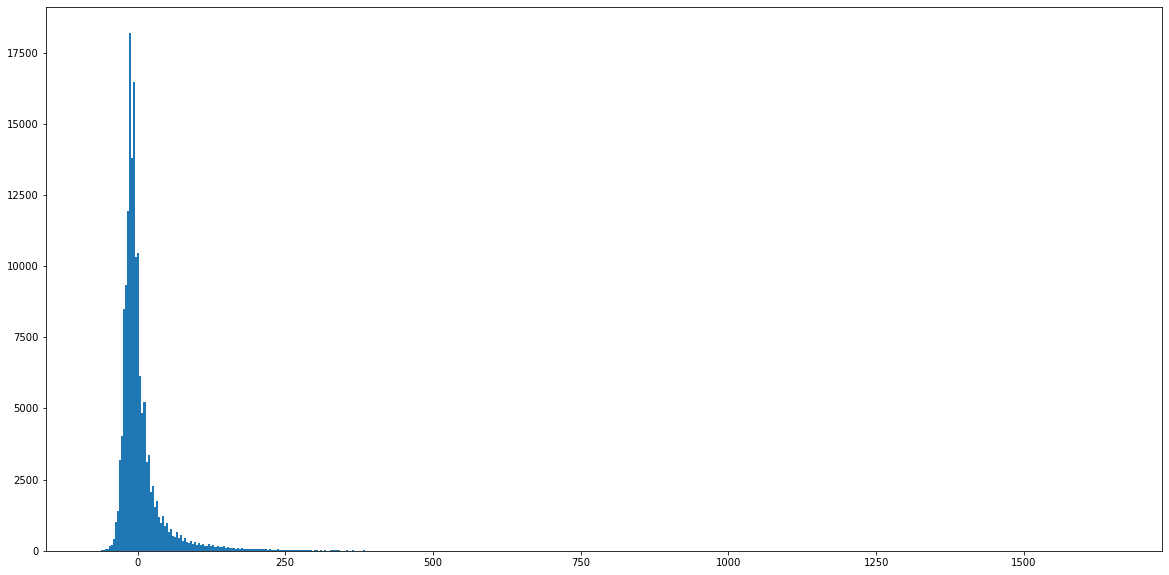

In [77]:
plt.figure(figsize=(20,10))
plt.hist(delay_nona, bins = 500)
plt.show()

In [82]:
delay_sample = delay_nona.sample(5000)

In [83]:
 stats.shapiro(delay_sample).pvalue

0.0

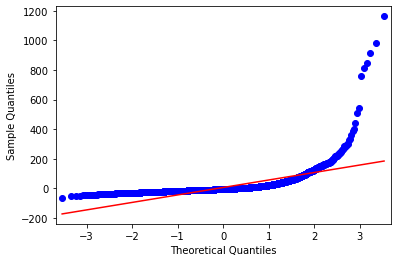

In [84]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


qqplot(delay_sample, line='s')
pyplot.show()

In [85]:
conf_int = stats.norm.interval(0.68, loc=delay_sample.mean(), 
    scale=delay_sample.std())

In [89]:
delay_sample.mean()

5.3608

In [90]:
delay_sample.std()

50.4902810158095

In [91]:
conf_int

(-44.849657981647496, 55.57125798164751)

In [92]:
delay_2 = delay_sample[delay_sample<delay.std()*3]

In [93]:
delay_2.std()

27.750432968889463

In [94]:
delay_2.mean()

1.1375177737152142

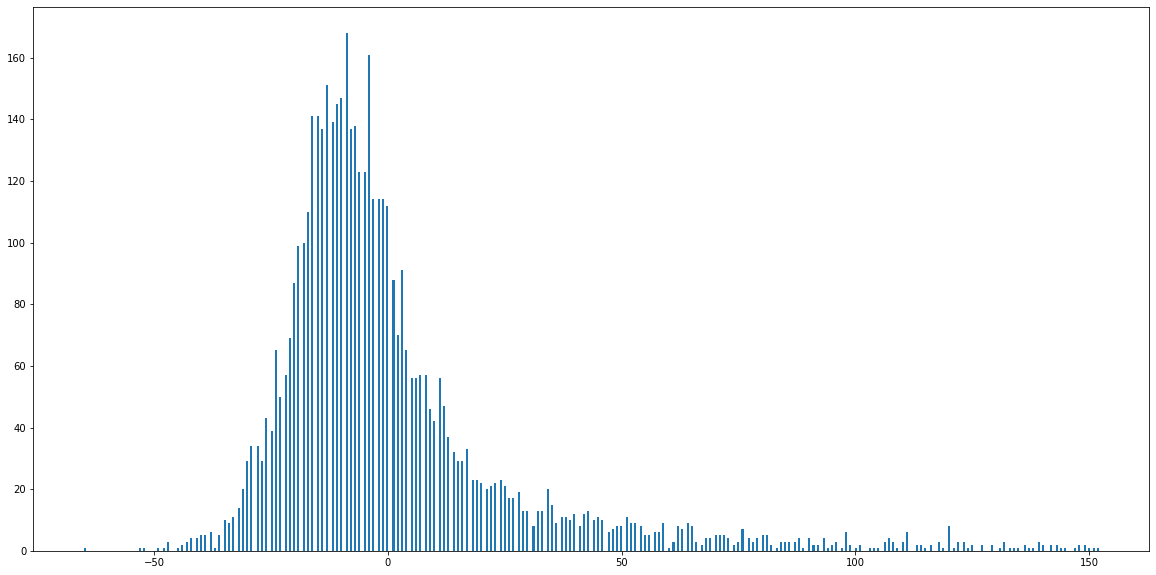

In [95]:
plt.figure(figsize=(20,10))
plt.hist(delay_2, bins = 500)
plt.show()

In [96]:
 stats.shapiro(delay_2).pvalue

0.0

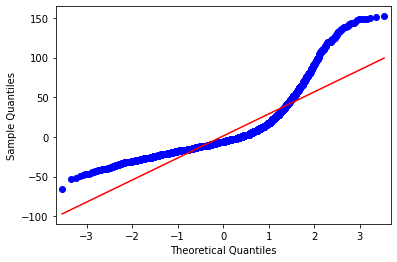

In [97]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot


qqplot(delay_2, line='s')
pyplot.show()

In [546]:
stats.lognorm.fit(delay_2)

(0.3337829006150791, -67.6819818680994, 64.7387124939551)

In [103]:
#stats.kstest(delay_2, 'lognorm')
stats.kstest(delay_2, 'lognorm',stats.lognorm.fit(delay_2))


KstestResult(statistic=0.10936463632755633, pvalue=9.780758275162914e-52)

In [104]:
stats.lognorm.fit(delay_sample)

(3.8137316181437577, -65.00000029858205, 0.6200412770042235)

In [105]:
stats.kstest(delay_2, 'lognorm',stats.lognorm.fit(delay_sample))

KstestResult(statistic=0.8366536372618466, pvalue=0.0)

In [107]:
stats.normaltest(delay_sample).pvalue

0.0

In [108]:
stats.normaltest(delay_2).pvalue

0.0

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [109]:
flights_1_copy = flights_1.copy()

In [110]:
flights_1_copy['month']=flights_1_copy.fl_date

In [111]:
flights_1_copy.month = flights_1_copy.month.map(lambda v: int(v[5:7]))


In [117]:
month_v_delays = flights_1_copy[['month','arr_delay']]

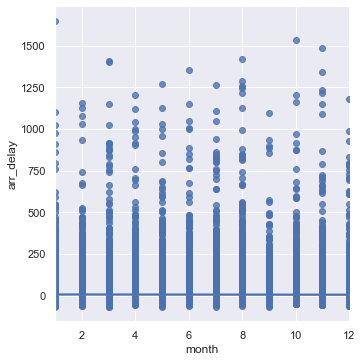

In [118]:
import seaborn as sns; sns.set_theme(color_codes=True)

g = sns.lmplot(x="month", y="arr_delay", data=month_v_delays)

In [130]:
flights_1_copy_month1 = flights_1_copy[flights_1_copy.month==1].arr_delay.dropna()
flights_1_copy_month2 = flights_1_copy[flights_1_copy.month==2].arr_delay.dropna()
flights_1_copy_month3 = flights_1_copy[flights_1_copy.month==3].arr_delay.dropna()
flights_1_copy_month4 = flights_1_copy[flights_1_copy.month==4].arr_delay.dropna()
flights_1_copy_month5 = flights_1_copy[flights_1_copy.month==5].arr_delay.dropna()
flights_1_copy_month6 = flights_1_copy[flights_1_copy.month==6].arr_delay.dropna()
flights_1_copy_month7 = flights_1_copy[flights_1_copy.month==7].arr_delay.dropna()
flights_1_copy_month8 = flights_1_copy[flights_1_copy.month==8].arr_delay.dropna()
flights_1_copy_month9 = flights_1_copy[flights_1_copy.month==9].arr_delay.dropna()
flights_1_copy_month10 = flights_1_copy[flights_1_copy.month==10].arr_delay.dropna()
flights_1_copy_month11 = flights_1_copy[flights_1_copy.month==11].arr_delay.dropna()
flights_1_copy_month12 = flights_1_copy[flights_1_copy.month==12].arr_delay.dropna()


In [134]:
stats.f_oneway(flights_1_copy_month1,
             flights_1_copy_month2,
             flights_1_copy_month3,
             flights_1_copy_month4,
             flights_1_copy_month5,
             flights_1_copy_month6,
             flights_1_copy_month7,
             flights_1_copy_month8,
             flights_1_copy_month9,
             flights_1_copy_month10,
             flights_1_copy_month11,
             flights_1_copy_month12).pvalue

1.3124775867467312e-90

In [549]:
print('Mean of Jan: ',flights_1_copy_month1.mean(),'\n',
             'Mean of Feb: ',flights_1_copy_month2.mean(),'\n',
             'Mean of Mar: ',flights_1_copy_month3.mean(),'\n',
             'Mean of Apr: ',flights_1_copy_month4.mean(),'\n',
             'Mean of May: ',flights_1_copy_month5.mean(),'\n',
             'Mean of Jun: ',flights_1_copy_month6.mean(),'\n',
             'Mean of Jul: ',flights_1_copy_month7.mean(),'\n',
             'Mean of Aug: ',flights_1_copy_month8.mean(),'\n',
             'Mean of Sep: ',flights_1_copy_month9.mean(),'\n',
             'Mean of Oct: ',flights_1_copy_month10.mean(),'\n',
             'Mean of Nov: ',flights_1_copy_month11.mean(),'\n',
             'Mean of Dec: ',flights_1_copy_month12.mean(),'\n',
             '\n')
print('Std of Jan: ',flights_1_copy_month1.std(),'\n',
             'Std of Feb: ',flights_1_copy_month2.std(),'\n',
             'Std of Mar: ',flights_1_copy_month3.std(),'\n',
             'Std of Apr: ',flights_1_copy_month4.std(),'\n',
             'Std of May: ',flights_1_copy_month5.std(),'\n',
             'Std of Jun: ',flights_1_copy_month6.std(),'\n',
             'Std of Jul: ',flights_1_copy_month7.std(),'\n',
             'Std of Aug: ',flights_1_copy_month8.std(),'\n',
             'Std of Sep: ',flights_1_copy_month9.std(),'\n',
             'Std of Oct: ',flights_1_copy_month10.std(),'\n',
             'Std of Nov: ',flights_1_copy_month11.std(),'\n',
             'Std of Dec: ',flights_1_copy_month12.std())

Mean of Jan:  4.045409592879512 
 Mean of Feb:  5.850384441429218 
 Mean of Mar:  3.911124501016796 
 Mean of Apr:  4.774859144205878 
 Mean of May:  6.772097575666315 
 Mean of Jun:  9.561670109176749 
 Mean of Jul:  8.600245735761781 
 Mean of Aug:  9.695371367061357 
 Mean of Sep:  0.441340349791054 
 Mean of Oct:  2.992882823391298 
 Mean of Nov:  3.4523443504996156 
 Mean of Dec:  4.633241967412822 
 

Std of Jan:  51.23429131824918 
 Std of Feb:  49.99592034728438 
 Std of Mar:  51.75449695170088 
 Std of Apr:  49.645154659224524 
 Std of May:  50.0818719348212 
 Std of Jun:  52.36012505680034 
 Std of Jul:  54.50448200531263 
 Std of Aug:  58.972393603850364 
 Std of Sep:  39.98932993278864 
 Std of Oct:  46.871719088493904 
 Std of Nov:  51.19862923103246 
 Std of Dec:  48.74629731641367


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

In [199]:
flights_1_copy2 = flights_1.copy()

In [200]:
flights_1_copy2['State'] = flights_1_copy2['origin_city_name'].str.extract(pat = ', (..)')

In [203]:
flights_1_copy2.State.unique()

array(['WI', 'LA', 'CA', 'OK', 'OR', 'AZ', 'TX', 'UT', 'MO', 'FL', 'NY',
       'NC', 'TN', 'PR', 'DC', 'WA', 'HI', 'SC', 'IL', 'GA', 'CO', 'PA',
       'MI', 'OH', 'AR', 'NV', 'IA', 'AL', 'VA', 'MS', 'NJ', 'MA', 'MN',
       'NM', 'IN', 'ID', 'MD', 'KY', 'MT', 'KS', 'AK', 'CT', 'ME', 'TT',
       'ND', 'NH', 'WY', 'NE', 'SD', 'VT', 'VI', 'RI', 'WV'], dtype=object)

In [204]:
len(flights_1_copy2)

159961

In [223]:
flights_1_copy2.groupby('State').mkt_carrier_fl_num.count().sort_values(ascending=False)

State
CA    17531
TX    15726
FL    11508
IL    10228
GA     8286
NY     8132
NC     7464
CO     6249
PA     4860
DC     4770
WA     4576
MI     4569
AZ     4278
NV     3822
OH     3596
MN     3458
NJ     3331
MA     3140
MO     2957
TN     2802
UT     2585
HI     2463
OR     2259
MD     2105
LA     1724
VA     1561
IN     1480
SC     1444
WI     1402
OK      922
AL      887
AK      823
KY      789
NE      696
ID      688
AR      675
NM      619
MT      615
PR      589
CT      588
IA      568
ND      450
ME      408
RI      373
KS      338
MS      336
SD      325
NH      244
VT      243
WY      199
WV      152
VI       84
TT       44
Name: mkt_carrier_fl_num, dtype: int64

In [225]:
CA = flights_1_copy2.groupby('State').mkt_carrier_fl_num.count()['CA']/len(flights_1_copy2)

In [227]:
TX = flights_1_copy2.groupby('State').mkt_carrier_fl_num.count()['TX']/len(flights_1_copy2)

In [229]:
FL = flights_1_copy2.groupby('State').mkt_carrier_fl_num.count()['FL']/len(flights_1_copy2)

In [231]:
IL = flights_1_copy2.groupby('State').mkt_carrier_fl_num.count()['IL']/len(flights_1_copy2)

In [234]:
GA = flights_1_copy2.groupby('State').mkt_carrier_fl_num.count()['GA']/len(flights_1_copy2)

In [235]:
NY = flights_1_copy2.groupby('State').mkt_carrier_fl_num.count()['NY']/len(flights_1_copy2)

In [236]:
NC = flights_1_copy2.groupby('State').mkt_carrier_fl_num.count()['NC']/len(flights_1_copy2)

In [238]:
CO = flights_1_copy2.groupby('State').mkt_carrier_fl_num.count()['CO']/len(flights_1_copy2)

In [239]:
CA + TX + FL + IL + GA + NY + NC + CO

0.5321547127112233

8 States make up 50% of the travel in the United States

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

In [507]:
flights_1_copy5 = flights_1.copy()

In [510]:
flights_1_copy5.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name'],
      dtype='object')

In [511]:
flights_1_copy5['flight_speed'] = flights_1_copy5.distance
flights_1_copy5.flight_speed = flights_1_copy5.flight_speed/flights_1_copy5.air_time

In [518]:
flights_1_copy5 = flights_1_copy5.dropna(subset=['flight_speed'])

In [523]:
flights_1_copy5.flight_speed.isnull().sum()

0

In [526]:
flights_1_copy5 = flights_1_copy5.dropna(subset=['dep_delay'])

In [527]:
flights_1_copy5.dep_delay.isnull().sum()

0

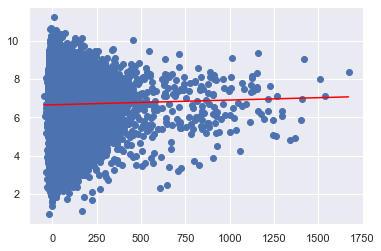

In [537]:
x = flights_1_copy5.dep_delay
y = flights_1_copy5.flight_speed

plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)), color = 'red')
plt.scatter(x, y)#, 'o', color='black');
#plt.plot(x, w*x, c='red')

In [538]:
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

9.418699958209476e-05


#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [240]:
flights_1_copy3 = flights_1.copy()

In [280]:
sort_flights_1_copy3 = flights_1_copy3[flights_1_copy3.crs_elapsed_time/60<3]
medium_flights_1_copy3 = flights_1_copy3[(flights_1_copy3.crs_elapsed_time/60>=3)&(flights_1_copy3.crs_elapsed_time/60<6)]
long_flights_1_copy3 = flights_1_copy3[flights_1_copy3.crs_elapsed_time/60>=6]


In [285]:
(long_flights_1_copy3.crs_elapsed_time/60).max()

11.583333333333334

In [295]:
sort_flight_hours = round(sort_flights_1_copy3.wheels_off/100)
medium_flight_hours = round(medium_flights_1_copy3.wheels_off/100)
long_flight_hours = round(long_flights_1_copy3.wheels_off/100)

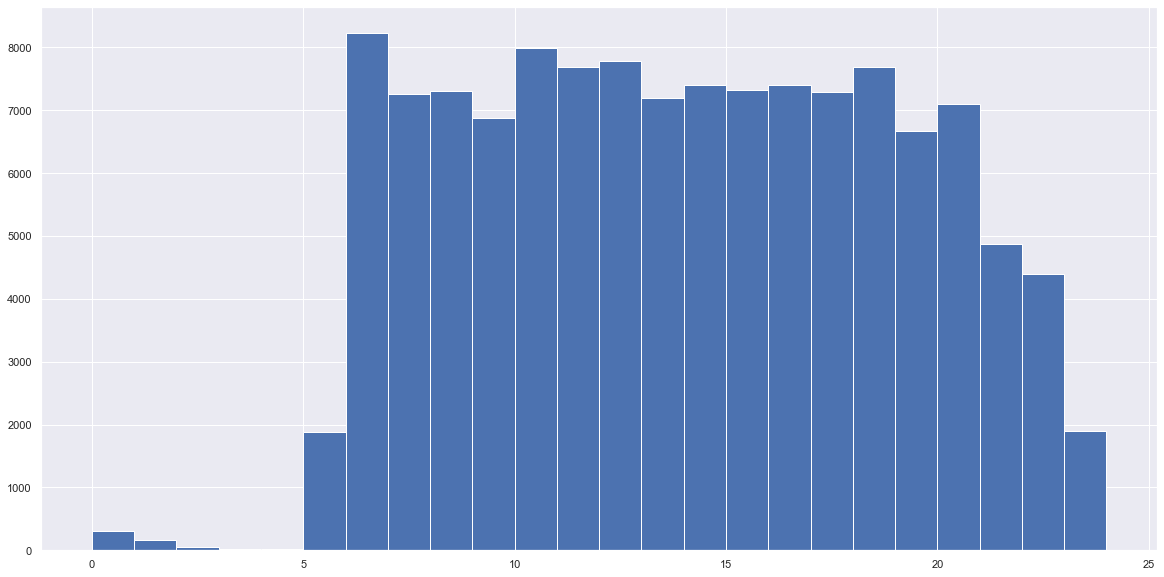

In [300]:
plt.figure(figsize=(20,10))
plt.hist(sort_flight_hours, bins = 24)
plt.show()

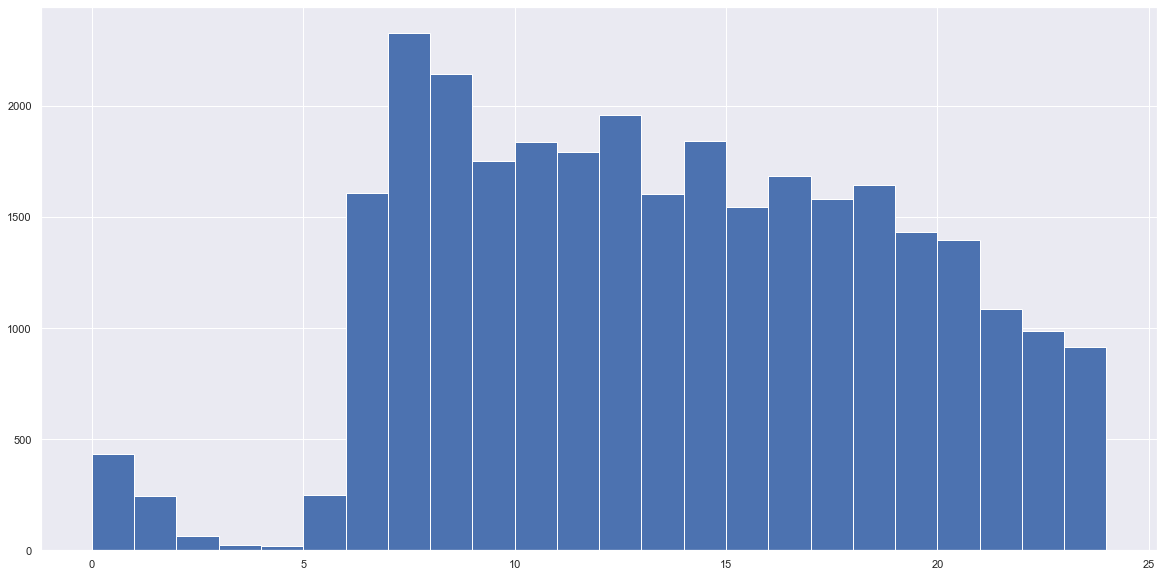

In [301]:
plt.figure(figsize=(20,10))
plt.hist(medium_flight_hours, bins = 24)
plt.show()

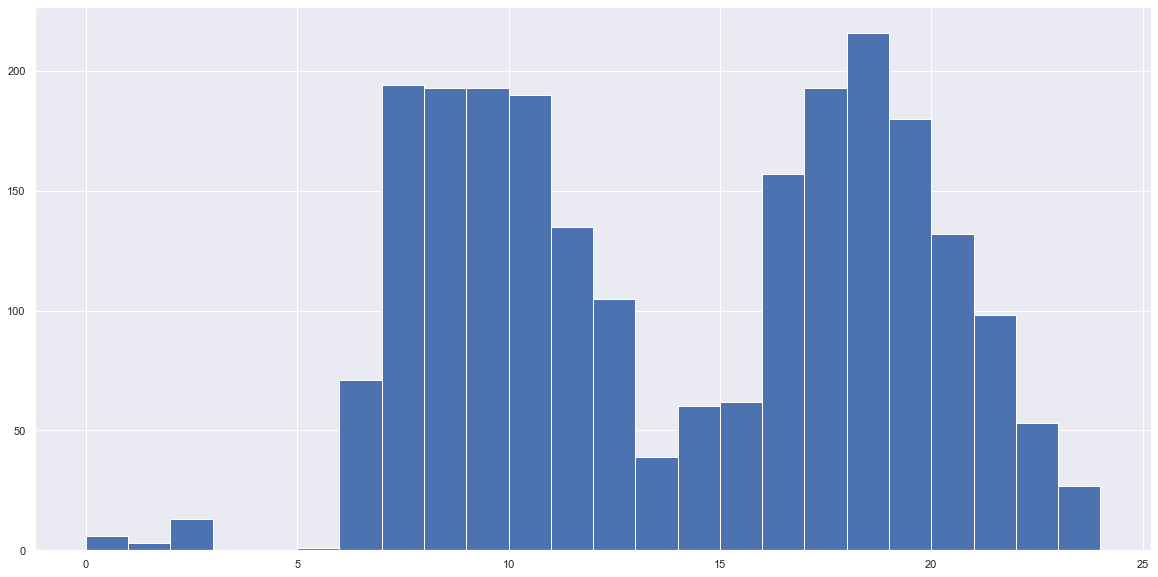

In [303]:
plt.figure(figsize=(20,10))
plt.hist(long_flight_hours, bins = 24)
plt.show()

In [308]:
sort_flight_hours.mode()

0    6.0
dtype: float64

In [310]:
medium_flight_hours.mode()

0    7.0
dtype: float64

In [313]:
long_flight_hours.mode()

0    18.0
dtype: float64

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [317]:
flights_1_copy4 = flights_1.copy()
fuel_consumption_copy = fuel_consumption.copy()
passengers_10_copy = passengers_10.copy()

In [341]:
flights_1_copy4['month']=flights_1_copy4.fl_date
flights_1_copy4.month = flights_1_copy4.month.map(lambda v: int(v[5:7]))

### First Point
Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)

In [600]:
flights_1_op_unique_carrier = list(flights_1_copy4.op_unique_carrier.unique())

In [392]:
flights_1_copy4_1 = flights_1_copy4.dropna(subset=['arr_delay'])

In [599]:
ave_mon_delay_per_air_car = flights_1_copy4_1.groupby(['op_unique_carrier','month']).arr_delay.mean().groupby('op_unique_carrier').mean()
ave_mon_delay_per_air_car = ave_mon_delay_per_air_car.sort_values()



<BarContainer object of 28 artists>

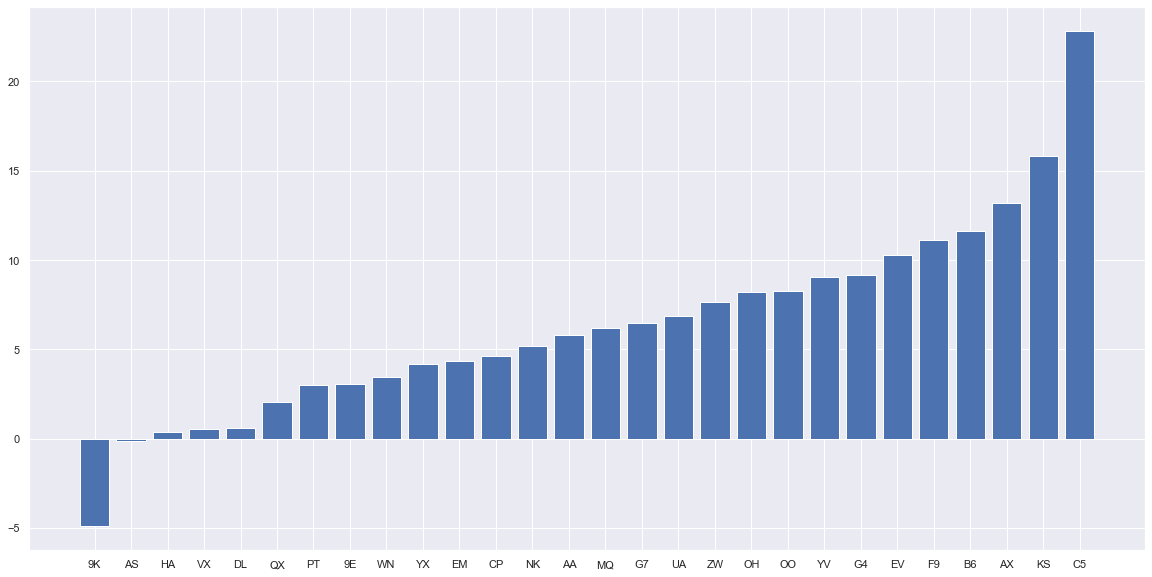

In [553]:
plt.figure(figsize=(20,10))
plt.bar(ave_mon_delay_per_air_car.keys(), ave_mon_delay_per_air_car)

### Second Point
Find out distance covered monthly by different air carriers

In [598]:
monthly_dist_per_air_car = flights_1_copy4.groupby(['op_unique_carrier','month']).distance.sum().groupby('op_unique_carrier').mean()
monthly_dist_per_air_car = monthly_dist_per_air_car.sort_values()



<BarContainer object of 28 artists>

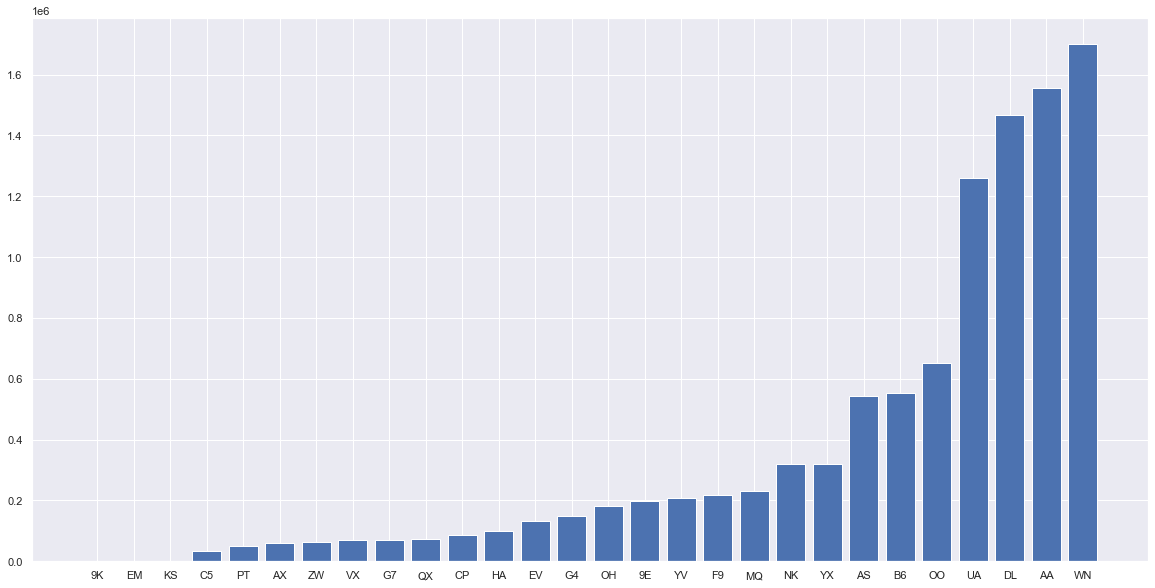

In [551]:
plt.figure(figsize=(20,10))
plt.bar(monthly_dist_per_air_car.keys(), monthly_dist_per_air_car)

### Third Point
Find out number of passengers that were carried by different air carriers

In [575]:
passengers_10_unique_carrier = passengers_10_copy[passengers_10_copy.unique_carrier.isin(flights_1_op_unique_carrier)]
passengers_10_unique_carrier = passengers_10_unique_carrier.groupby('unique_carrier').passengers.sum().sort_values()


<BarContainer object of 28 artists>

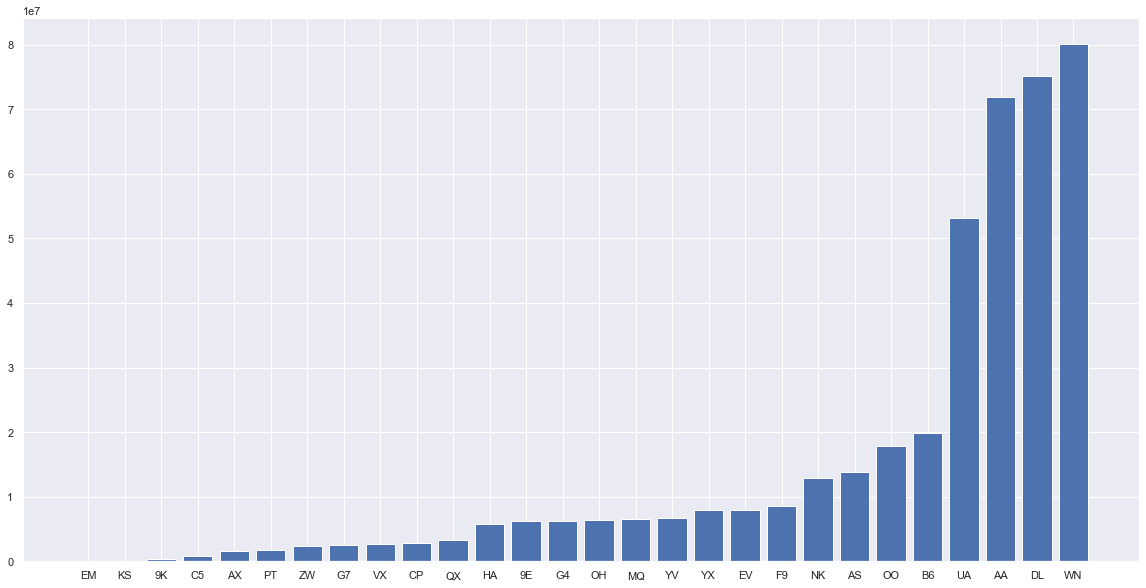

In [583]:
plt.figure(figsize=(20,10))
plt.bar(passengers_10_unique_carrier.keys(), passengers_10_unique_carrier)

### Fourth Point
Find out total fuel comsumption per air carrier.

In [597]:
fuel_consumption_unique_carrier = fuel_consumption_copy[fuel_consumption_copy.unique_carrier.isin(flights_1_op_unique_carrier)]
fuel_consumption_unique_carrier = fuel_consumption_unique_carrier.groupby('unique_carrier').total_gallons.sum().sort_values()


<BarContainer object of 22 artists>

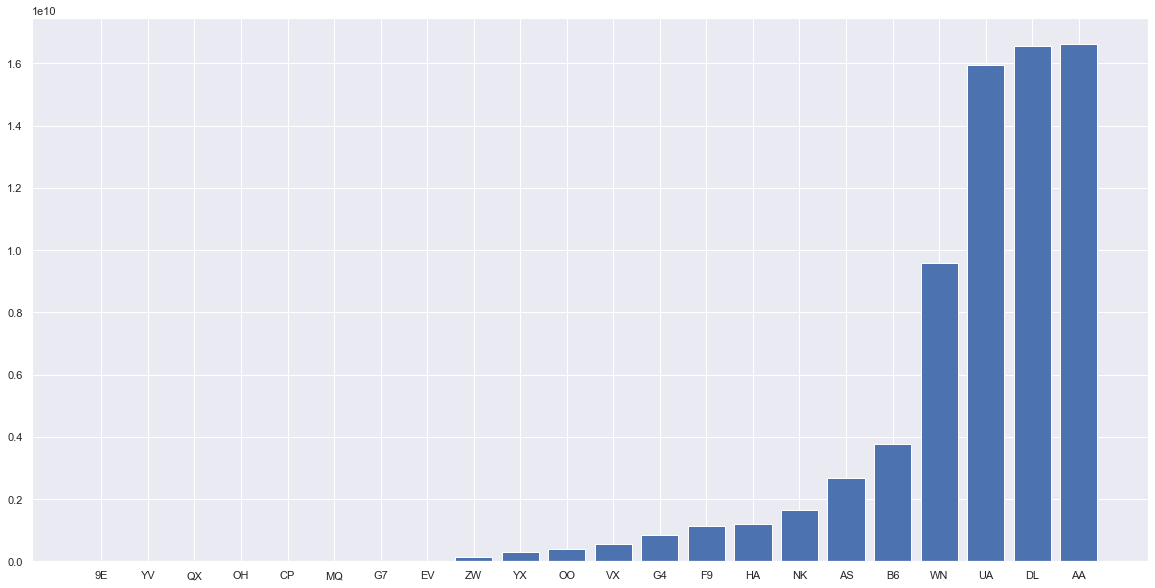

In [596]:
plt.figure(figsize=(20,10))
plt.bar(fuel_consumption_unique_carrier.keys(), fuel_consumption_unique_carrier)